### <center>SSE Classifier</center>

#### <span style = "color:red">Get the Data</span>

In [261]:
import numpy as np
import pandas as pd

data = pd.read_csv('../data_5.csv')

In [262]:
data = data.drop(['Cryo', 'PDB', 'Cryo Type', 'neighbor trees', 'Peak Level', 'Size Cutoff >'], axis = 1)
columns = {'Map Resolution': 'Resolution', 'vTree#':'Tree_N', 'numOfVoxels': 'Voxel_N', 'numberOfNeighbors':'N_Neighbors', 'Max Density':'Max_density', 'MinDensity':'Min_density', 'AvgDensity':'Avg_density', 'stdDensity':'Std_density', 'Percentage of voxels within 1 std':'1_std', 'Percentage of voxels within 2 std':'2_std', 'PCA_EigenValue1':'PCA_1', 'PCA_EigenValue2':'PCA_2', 'PCA_EigenValue3':'PCA_3', 'PCA Thickness Ratio ev1/ev2':'Thick_R_12', 'PCA Thickness Ratio ev2/ev3':'Thick_R_23', 'Structure Tensor Helix (Percentage)':'Tensor_helix', 'Structure Tensor Sheet (Percentage)':'Tensor_sheet', 'Percentage of voxels with density less than average':'Per_voxel', 'Radius of Gyration':'R_Gyr', 'Width':'Width', 'Hlx overlap (percentage)':'Hlx_Per', 'Strand overlap (percentage)':'Sheet_Per', 'Loop overlap (percentage)':'Loop_Per', 'Unknown (percentage) - most likely outside protein model (noise)':'Unknown'}
data = data.rename(columns=columns)

In [263]:
temp = data[['Hlx_Per', 'Sheet_Per', 'Loop_Per', 'Unknown']]
max_Per = np.max(temp, axis=1)
#temp.shape, max_Per.shape
data['Max_Per'] = max_Per
data.head()
threshold = 0.9 # select data whose maximum overlap percentage is greater than a threshold
data = data[data['Max_Per'] > threshold]
data = data.drop(['Hlx_Per', 'Sheet_Per', 'Loop_Per', 'Unknown', 'Max_Per'], axis = 1)

In [264]:
data.head()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,...,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,Label
1,5.6,73,125,6,0.65,0.51,0.57,0.04,0.62,0.98,...,5.79,2.31,1.60,2.51,0.50,0.50,0.53,4.2,5.16151,Loop
3,5.6,103,92,4,0.65,0.46,0.54,0.04,0.62,0.98,...,3.60,2.27,2.05,1.58,0.45,0.55,0.52,3.7,3.64974,Loop
5,5.6,116,78,4,0.60,0.46,0.52,0.03,0.60,0.99,...,2.56,1.57,5.50,1.63,0.54,0.46,0.50,4.3,2.10718,Loop
6,5.6,102,94,5,0.62,0.49,0.54,0.03,0.64,0.96,...,3.11,2.04,3.35,1.53,0.46,0.54,0.50,4.0,4.47000,Loop
7,5.6,66,132,3,0.66,0.49,0.55,0.04,0.62,0.97,...,4.63,3.38,1.49,1.37,0.67,0.33,0.55,3.9,5.16151,Helix


In [265]:
data = data.loc[(data['Thick_R_12'] > 0) & (data['Thick_R_23'] > 0) & (data['Resolution'] >= 5.3), :] # remove the negative Thick_R_12 and Thick_R_23

In [266]:
data_Helix = data[data['Label'] == 'Helix']
data_Sheet = data[data['Label'] == 'Sheet']
data_Loop = data[data['Label'] == 'Loop']
data_Unknown = data[data['Label'] == 'Unknown']

print(data_Helix.shape, data_Sheet.shape, data_Loop.shape, data_Unknown.shape)

(2026, 21) (784, 21) (590, 21) (239, 21)


In [267]:
data_Helix = data_Helix.sample(n = 350, random_state = 42)
data_Sheet = data_Sheet.sample(n = 700, random_state = 42)
data_Loop = data_Loop.sample(n = 350, random_state = 42)

In [268]:
data = pd.concat([data_Helix, data_Sheet, data_Loop])

In [269]:
data.head()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,...,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width,Label
7040,7.7,6,72,3,0.61,0.43,0.49,0.05,0.67,0.94,...,3.70,2.65,2.10,1.40,0.75,0.25,0.60,3.8,3.75659,Helix
4833,6.6,428,59,2,0.52,0.44,0.47,0.03,0.59,1.00,...,1.93,1.52,1.58,1.27,0.20,0.80,0.54,2.6,3.67696,Helix
8285,6.8,16,142,5,0.83,0.71,0.76,0.03,0.68,0.96,...,5.34,3.24,4.63,1.65,0.68,0.32,0.54,5.8,3.11769,Helix
3591,8.2,31,148,3,0.69,0.48,0.58,0.05,0.57,0.98,...,5.62,2.19,1.25,2.57,0.48,0.52,0.54,3.9,4.23745,Helix
7062,5.9,37,140,2,0.65,0.47,0.53,0.04,0.68,0.95,...,4.02,3.29,3.34,1.22,0.53,0.47,0.61,4.6,3.89469,Helix


In [270]:
data.describe()

,Resolution,Tree_N,Voxel_N,N_Neighbors,Max_density,Min_density,Avg_density,Std_density,1_std,2_std,PCA_1,PCA_2,PCA_3,Thick_R_12,Thick_R_23,Tensor_helix,Tensor_sheet,Per_voxel,R_Gyr,Width
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,6.571407,64.444286,137.055714,3.152857,0.619114,0.482671,0.546286,0.032914,0.644586,0.971386,11.047786,3.863500,1.943964,2.884207,2.091129,0.492836,0.507250,0.524379,3.914500,4.150348
std,1.154814,81.614383,126.370185,1.703398,0.094738,0.069795,0.076498,0.013946,0.040315,0.018732,12.332523,2.546605,1.031115,2.590419,0.997029,0.180460,0.180456,0.045896,1.445081,1.736090
min,5.500000,1.000000,10.000000,0.000000,0.310000,0.240000,0.290000,0.000000,0.460000,0.870000,0.440000,0.420000,0.120000,0.290000,0.350000,0.000000,0.000000,0.330000,1.300000,0.000000
25%,5.800000,17.000000,47.000000,2.000000,0.550000,0.440000,0.500000,0.020000,0.620000,0.960000,4.350000,2.230000,1.187500,1.650000,1.450000,0.370000,0.400000,0.500000,2.900000,3.031240
50%,5.900000,36.000000,103.000000,3.000000,0.620000,0.470000,0.540000,0.030000,0.640000,0.970000,7.640000,3.365000,1.860000,2.210000,1.810000,0.470000,0.530000,0.530000,3.800000,3.894690
75%,7.000000,73.000000,188.000000,4.000000,0.680000,0.520000,0.590000,0.040000,0.670000,0.980000,13.070000,4.892500,2.570000,3.120000,2.380000,0.600000,0.630000,0.550000,4.600000,4.874480
max,9.800000,486.000000,1252.000000,10.000000,0.950000,0.780000,0.870000,0.090000,0.820000,1.000000,211.190000,31.670000,7.970000,49.870000,10.440000,1.000000,1.000000,0.710000,14.900000,17.490000


#### <span style = "color:red">Discover and visualize the data to gain insights</span>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a380a2f50>,
      dtype=object)

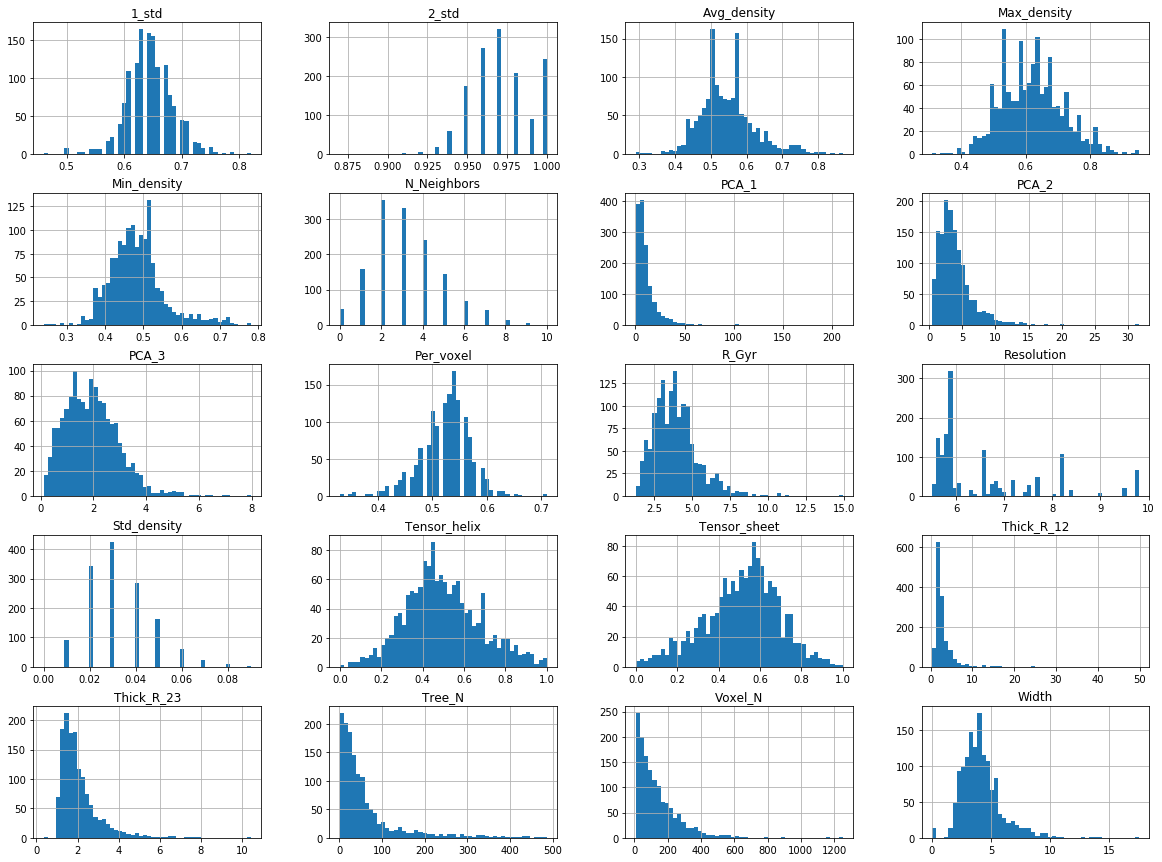

In [271]:
data.hist(bins = 50, figsize = (20, 15))

#### <span style = "color:red">Prepare Training Set and Test Set</span>

In [272]:
data_X = data.iloc[:, 0:-1]
data_Y = data.iloc[:, -1]

In [273]:
import warnings
warnings.filterwarnings('ignore')

In [274]:
data_Y[data_Y == 'Helix'] =0
data_Y[data_Y == 'Sheet'] =1
data_Y[data_Y == 'Loop'] = 0

In [275]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=0.2, random_state=42, stratify = data_Y)
train_Y = train_Y.astype(np.int64)
test_Y = test_Y.astype(np.int64)

In [276]:
import numpy as np
from sklearn.model_selection import cross_val_score

def cross_validation(model, X, Y, k = 10, metric = 'accuracy'):
    scores = cross_val_score(model, X, Y, scoring=metric, cv = k);
    return scores.mean(), scores.std()

#### <span style = "color:red">Prepare the Data for Machine Learning Algorithms</span>

In [277]:
# Select specific columns
from sklearn.base import BaseEstimator, TransformerMixin
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
    
# Create Pipeline for Numeric Columns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

left_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', '2_std', 
       'PCA_2', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'R_Gyr'])),
    ("transform", QuantileTransformer(n_quantiles=200, output_distribution='normal', random_state=42))
])

right_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(['Resolution', 'N_Neighbors'])),
])

from sklearn.pipeline import FeatureUnion

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("left_pipeline", left_pipeline),
        ("right_pipeline", right_pipeline),
    ])

train_X = pd.DataFrame(preprocess_pipeline.fit_transform(train_X), columns=['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', '2_std', 
       'PCA_2', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'R_Gyr', 'Resolution', 'N_Neighbors'])
test_X = pd.DataFrame(preprocess_pipeline.transform(test_X), columns=['Tree_N', 'Voxel_N', 'Max_density',
       'Min_density', 'Avg_density', 'Std_density', '2_std', 
       'PCA_2', 'Thick_R_12', 'Thick_R_23', 'Tensor_helix',
       'Tensor_sheet', 'R_Gyr', 'Resolution', 'N_Neighbors'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1e68a910>,
      dtype=object)

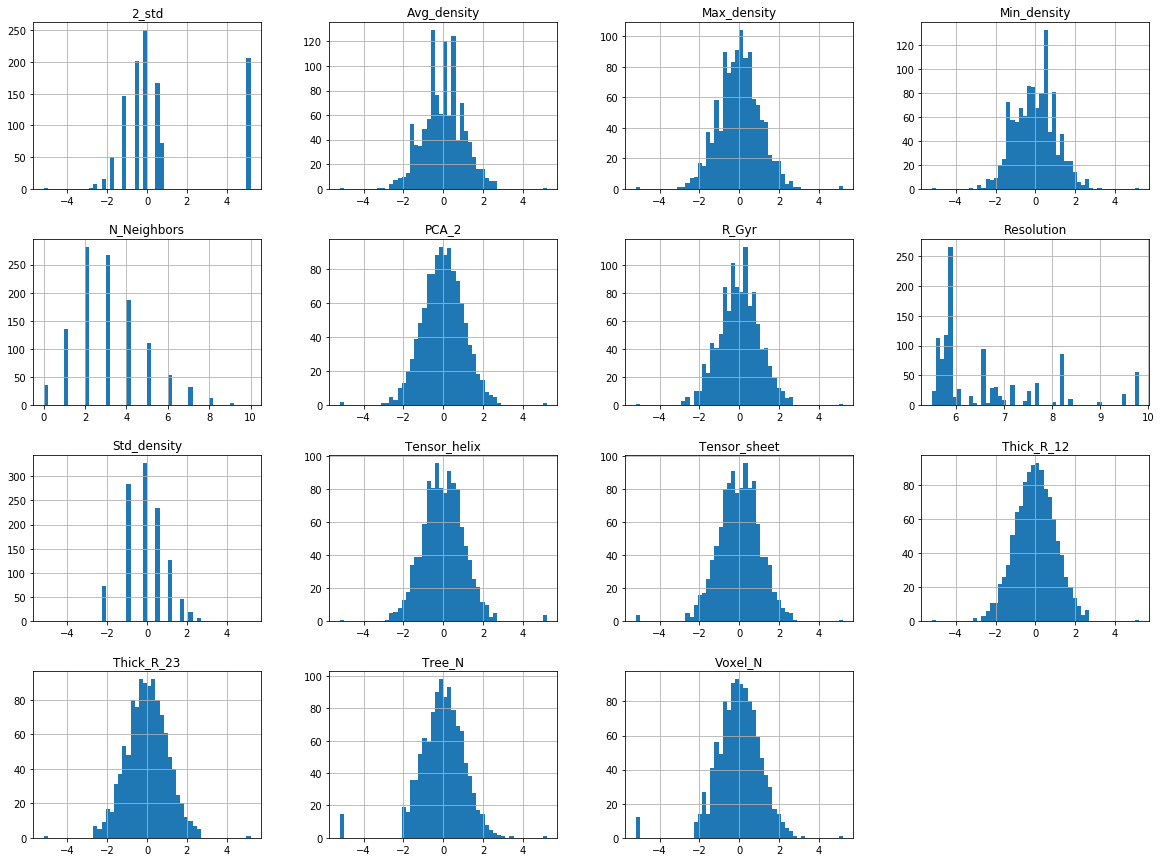

In [278]:
train_X.hist(bins = 50, figsize = (20, 15))

#### <span style="color:red">Select Models</span>

In [279]:
models = [] # save models
model_names = ['RFT', 'LR', 'LinearSVM', 'SVM', 'KNN', 'ANN', 'XGBoost']

from sklearn.ensemble import RandomForestClassifier
models.append(RandomForestClassifier())

from sklearn.linear_model import LogisticRegression
models.append(LogisticRegression(solver='lbfgs', multi_class='multinomial'))

from sklearn.svm import LinearSVC
models.append(LinearSVC(loss="hinge"))

from sklearn.svm import SVC
models.append(SVC())

from sklearn.neighbors import KNeighborsClassifier
models.append(KNeighborsClassifier())

from sklearn.neural_network import MLPClassifier
models.append(MLPClassifier())

import xgboost
models.append(xgboost.XGBClassifier())

In [280]:
# accuracy
for index, model in enumerate(models):
    mean, std = cross_validation(model, train_X, train_Y, 10)
    print(model_names[index], mean, std)

RFT 0.7446428571428572 0.025938998297024903
LR 0.7464285714285714 0.023007319154866295
LinearSVM 0.7500000000000001 0.02187044413199267
SVM 0.7455357142857142 0.025332608855555553
KNN 0.7026785714285715 0.02650146799938542
ANN 0.7491071428571429 0.030265091529782698
XGBoost 0.7446428571428572 0.032241910866549636


In [281]:
# f1
for index, model in enumerate(models):
    mean, std = cross_validation(model, train_X, train_Y, 10, metric = 'f1_macro')
    print(model_names[index], mean, std)

RFT 0.7389345495962266 0.02391158008132778
LR 0.7457042607464693 0.023514671998437243
LinearSVM 0.7501505751067125 0.024864910435689426
SVM 0.744718472701958 0.026161959937670145
KNN 0.7011688307160946 0.027407564177367835
ANN 0.737112099671186 0.035728562766734646
XGBoost 0.7436430576137985 0.0335766463942324


#### <span style = "color:red">Fine-Tune Models</span>

In [282]:
from sklearn.model_selection import GridSearchCV

In [283]:
# Random Forest
param_grid = [{'n_estimators': [1500], 'max_features': ['sqrt']}]
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
rft_clf = grid_search.best_estimator_

[0.74286414]


In [284]:
# SVM
param_grid = [{'C': [1.2, 1.4, 1.6], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'] }]
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
svm_clf = grid_search.best_estimator_

[0.75015251 0.75922714 0.74738231 0.65478988 0.75015251 0.73123497
 0.73427783 0.51020901 0.75012386 0.76011735 0.74905387 0.64956837
 0.75012386 0.72506131 0.72883942 0.5074573  0.75103837 0.75655869
 0.74906157 0.64489132 0.75103837 0.7252672  0.72635867 0.50161999]


In [285]:
# MLP
param_grid = [{'hidden_layer_sizes': [(100,), (50,), (150,)], 'activation': ['tanh']}]
grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
mlp_clf = grid_search.best_estimator_

[0.74023072 0.75118149 0.74083877]


In [286]:
# XGBoost
param_grid = [{'eta': [0.2], 'n_estimators': [100, 200, 300], 'tree_method': ['auto']}]
grid_search = GridSearchCV(xgboost.XGBClassifier(), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
xgboost_clf = grid_search.best_estimator_

[0.74364306 0.75254928 0.75468257]


In [287]:
# Logistic Regression
param_grid = [{'penalty': ['l1', 'l2', 'elasticnet'], 'C':[0.8, 1.0, 1.2]}]
grid_search = GridSearchCV(LogisticRegression(solver='lbfgs', multi_class='multinomial'), param_grid, cv=10, scoring='f1_macro')
grid_search.fit(train_X, train_Y)
print(grid_search.cv_results_['mean_test_score'])
lr_clf = grid_search.best_estimator_

[       nan 0.74474522        nan        nan 0.74570426        nan
        nan 0.74393066        nan]


#### <span style = "color:red">Ensemble Models</span>

In [288]:
# Voting
from sklearn.ensemble import VotingClassifier
#voting_clf = VotingClassifier(
#    estimators=[('rft', rft_clf), ('svm', svm_clf), ('mlp', mlp_clf), ('xgboost', xgboost_clf)],
#    voting='hard')

#mean, std = cross_validation(voting_clf, train_X, train_Y, 10)
#print(mean, std)

In [289]:
# Stacking
from sklearn.ensemble import StackingClassifier
#estimators=[('rft', rft_clf), ('svm', svm_clf), ('mlp', mlp_clf), ('xgboost', xgboost_clf)]
#stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

#mean, std = cross_validation(stacking_clf, train_X, train_Y, 10)
#print(mean, std)

#### <span style = "color:red">Evaluate System on the Test Set</span>

In [290]:
estimators=[('rft', rft_clf), ('svm', svm_clf), ('mlp', mlp_clf), ('xgboost', xgboost_clf)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

stacking_clf.fit(train_X, train_Y)
y_test_pred = stacking_clf.predict(test_X)

In [291]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, y_test_pred, target_names=['None-Sheet', 'Sheet']))

              precision    recall  f1-score   support

  None-Sheet       0.81      0.78      0.79       140
       Sheet       0.79      0.81      0.80       140

    accuracy                           0.80       280
   macro avg       0.80      0.80      0.80       280
weighted avg       0.80      0.80      0.80       280



#### <span style = "color:red">Reference</span>
* <a href = "https://xgboost.readthedocs.io/en/latest/index.html">XGBoost</a>